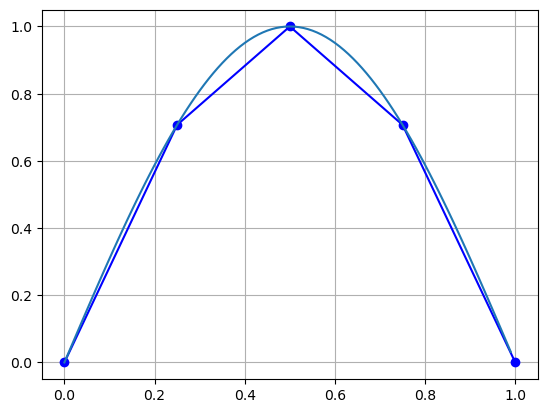

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import math as mt
from sympy import *

def f(t):
    return mt.sin(mt.pi*t)
l_i = [i/4 for i in range(5)]
f_i = [f(i) for i in l_i]
plt.plot(l_i, f_i, '-ob')
x = np.arange(0, 1, 0.01)
plt.plot(x, [f(i) for i in x])
plt.grid()
# plt.xlim([0.2, 0.4])
# plt.ylim([0.8, 1])

In [21]:
def interpolar(x0, x1):
    x = symbols('x')
    return (f(x1) - f(x0))/(x1-x0)*(x-x0) + f(x0)
for i in range(len(l_i)-1):
    print(f'{l_i[i]} <= x <= {l_i[i+1]}: {interpolar(l_i[i], l_i[i+1])}')

0.0 <= x <= 0.25: 2.82842712474619*x
0.25 <= x <= 0.5: 1.17157287525381*x + 0.414213562373095
0.5 <= x <= 0.75: 1.5857864376269 - 1.17157287525381*x
0.75 <= x <= 1.0: 2.82842712474619 - 2.82842712474619*x


Экспериментальная погрешность: 0.0018120971621191362
Teоpетическая погрешность: 1.43353717964517


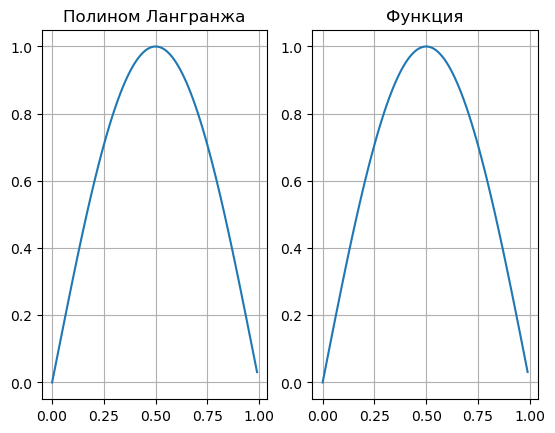

In [22]:
lagrange = 0
for i in range(len(l_i)):
    p = np.poly1d(1)
    for j in range(len(l_i)):
        if j != i:
            p *= np.poly1d([l_i[j]], True)/(l_i[i] - l_i[j])
    lagrange += f_i[i]*p
plt. subplot(121)
x = np.arange(0, 1, 0.01)
plt.plot(x, lagrange(x))
plt.title("Полином Лангранжа")
plt.grid()
plt. subplot(122)
plt.title("Функция")
plt.plot(x, [f(i) for i in x])
plt.grid()
print(f'Экспериментальная погрешность: {max([abs(f(x) - lagrange(x)) for x in np.arange(0, 1, 0.001)])}')
x = symbols('x')
M = np.pi**4 * mt.sin(mt.pi*l_i[-1]/4)
pogr = (M/factorial(len(l_i))) * np.poly1d(l_i)
print(f'Teоpетическая погрешность: {max([pogr(i) for i in np.arange(0, 1, 0.001)])}')